In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sn
from matplotlib import pyplot as plt

This data was collected and cleaned by my self. So far only the 22/23 season has been covered, but more is to be added.

In [194]:
df = pd.read_csv("datasets/new_laliga_dataset.csv")
df.head()

,HomeTeam,AwayTeam,home_form,away_form,home_odd,draw_odd,away_odd,home_position,away_position,h2h,...,away_longballs,home_shots,away_shots,home_on_target,away_on_target,home_key_players,away_Key_players,home_conceded,away_conceded,FTR
0,Osasuna,Sevilla,DDDLL,DDDDW,3.10,3.1,2.55,0,0,AAAAD,...,20.9,11.7,12.3,3.6,3.9,1,1,0.9,1.6,H
1,Celta,relegation 2,DWLWL,LDLDD,1.73,3.6,4.75,0,0,ADDDA,...,17.5,12.4,11.1,4.3,4.1,2,3,1.4,1.8,D
2,relegation 1,Villarreal,LWWWW,LDWLW,3.30,3.4,2.20,0,0,DADAA,...,23.9,11.8,13.3,3.8,5.2,1,3,1.5,1.2,A
3,Barcelona,Vallecano,WWWDL,DDLLL,1.22,7.0,12.00,0,0,HHHAA,...,23.7,15.1,13.6,5.1,4.1,6,1,0.5,1.3,D
4,Cadiz,Sociedad,DWLDW,DLWWL,3.80,3.0,2.15,0,0,AAAAA,...,17.7,10.4,12.3,3.1,4.7,2,3,1.4,0.9,A


In [195]:
# # Apply label encoding to each h2h column
# for i in range(1, 6):
#     col_name = f'h2h_{i}'
#     df[col_name] = label_encoder.fit_transform(df[col_name])

# # Now, the h2h columns are label encoded with numerical values


In [196]:
# Initialize new columns with default values
df['home_win_form'] = 0
df['home_draw_form'] = 0
df['home_lose_form'] = 0

# Loop through each row and count the occurrences of 'A', 'H', and 'D'
for index, row in df.iterrows():
    home_form_string = row['home_form']
    char_counts = dict(pd.Series(list(home_form_string)).value_counts())
    
    # Calculate the count and update the respective columns
    if 'W' in char_counts:
        df.at[index, 'home_win_form'] = (char_counts['W'] / 5.0)*3
    if 'D' in char_counts:
        df.at[index, 'home_draw_form'] = (char_counts['D'] / 5.0)
    if 'L' in char_counts:
        df.at[index, 'home_lose_form'] = (char_counts['L'] / 5.0)*0

# Drop the original 'home_form' column if not needed
df['home_form'] = df['home_win_form']+df['home_draw_form']+df['home_lose_form']

df.head()

,HomeTeam,AwayTeam,home_form,away_form,home_odd,draw_odd,away_odd,home_position,away_position,h2h,...,home_on_target,away_on_target,home_key_players,away_Key_players,home_conceded,away_conceded,FTR,home_win_form,home_draw_form,home_lose_form
0,Osasuna,Sevilla,0.6,DDDDW,3.10,3.1,2.55,0,0,AAAAD,...,3.6,3.9,1,1,0.9,1.6,H,0.0,0.6,0
1,Celta,relegation 2,1.4,LDLDD,1.73,3.6,4.75,0,0,ADDDA,...,4.3,4.1,2,3,1.4,1.8,D,1.2,0.2,0
2,relegation 1,Villarreal,2.4,LDWLW,3.30,3.4,2.20,0,0,DADAA,...,3.8,5.2,1,3,1.5,1.2,A,2.4,0.0,0
3,Barcelona,Vallecano,2.0,DDLLL,1.22,7.0,12.00,0,0,HHHAA,...,5.1,4.1,6,1,0.5,1.3,D,1.8,0.2,0
4,Cadiz,Sociedad,1.6,DLWWL,3.80,3.0,2.15,0,0,AAAAA,...,3.1,4.7,2,3,1.4,0.9,A,1.2,0.4,0


In [197]:
# Initialize new columns with default values
df['away_win_form'] = 0
df['away_draw_form'] = 0
df['away_lose_form'] = 0

# Loop through each row and count the occurrences of 'A', 'H', and 'D'
for index, row in df.iterrows():
    away_form_string = row['away_form']
    char_counts = dict(pd.Series(list(away_form_string)).value_counts())
    
    # Calculate the count and update the respective columns
    if 'W' in char_counts:
        df.at[index, 'away_win_form'] = (char_counts['W'] / 5.0) *3
    if 'D' in char_counts:
        df.at[index, 'away_draw_form'] = char_counts['D'] / 5.0
    if 'L' in char_counts:
        df.at[index, 'away_lose_form'] = char_counts['L'] / 5.0*0

# Drop the original 'home_form' column if not needed
df.drop(columns=['away_form'], inplace=True)
df['away_form'] = df['away_win_form']+df['away_draw_form']+df['away_lose_form']


df.head()

,HomeTeam,AwayTeam,home_form,home_odd,draw_odd,away_odd,home_position,away_position,h2h,home_possession,...,home_conceded,away_conceded,FTR,home_win_form,home_draw_form,home_lose_form,away_win_form,away_draw_form,away_lose_form,away_form
0,Osasuna,Sevilla,0.6,3.10,3.1,2.55,0,0,AAAAD,48.2,...,0.9,1.6,H,0.0,0.6,0,0.6,0.8,0,1.4
1,Celta,relegation 2,1.4,1.73,3.6,4.75,0,0,ADDDA,50.2,...,1.4,1.8,D,1.2,0.2,0,0.0,0.6,0,0.6
2,relegation 1,Villarreal,2.4,3.30,3.4,2.20,0,0,DADAA,48.8,...,1.5,1.2,A,2.4,0.0,0,1.2,0.2,0,1.4
3,Barcelona,Vallecano,2.0,1.22,7.0,12.00,0,0,HHHAA,64.8,...,0.5,1.3,D,1.8,0.2,0,0.0,0.4,0,0.4
4,Cadiz,Sociedad,1.6,3.80,3.0,2.15,0,0,AAAAA,41.6,...,1.4,0.9,A,1.2,0.4,0,1.2,0.2,0,1.4


In [198]:
df[(df['FTR']=='A') & (df['home_form'] > df['away_form'])][['HomeTeam','AwayTeam','home_form', 'away_form','FTR']].shape

(36, 5)

In [199]:
# Initialize new columns with default values
df['home_h2h_win'] = 0
df['h2h_draw'] = 0
df['away_h2h_win'] = 0

# Loop through each row and count the occurrences of 'A', 'H', and 'D'
for index, row in df.iterrows():
    home_form_string = row['h2h']
    char_counts = dict(pd.Series(list(home_form_string)).value_counts())
    
    # Calculate the count and update the respective columns
    if 'H' in char_counts:
        df.at[index, 'home_h2h_win'] = (char_counts['H'] / 5.0)*3
    if 'D' in char_counts:
        df.at[index, 'h2h_draw'] = (char_counts['D'] / 5.0)*3
    if 'A' in char_counts:
        df.at[index, 'away_h2h_win'] = (char_counts['A'] / 5.0)*3


df.head()

,HomeTeam,AwayTeam,home_form,home_odd,draw_odd,away_odd,home_position,away_position,h2h,home_possession,...,home_win_form,home_draw_form,home_lose_form,away_win_form,away_draw_form,away_lose_form,away_form,home_h2h_win,h2h_draw,away_h2h_win
0,Osasuna,Sevilla,0.6,3.10,3.1,2.55,0,0,AAAAD,48.2,...,0.0,0.6,0,0.6,0.8,0,1.4,0.0,0.6,2.4
1,Celta,relegation 2,1.4,1.73,3.6,4.75,0,0,ADDDA,50.2,...,1.2,0.2,0,0.0,0.6,0,0.6,0.0,1.8,1.2
2,relegation 1,Villarreal,2.4,3.30,3.4,2.20,0,0,DADAA,48.8,...,2.4,0.0,0,1.2,0.2,0,1.4,0.0,1.2,1.8
3,Barcelona,Vallecano,2.0,1.22,7.0,12.00,0,0,HHHAA,64.8,...,1.8,0.2,0,0.0,0.4,0,0.4,1.8,0.0,1.2
4,Cadiz,Sociedad,1.6,3.80,3.0,2.15,0,0,AAAAA,41.6,...,1.2,0.4,0,1.2,0.2,0,1.4,0.0,0.0,3.0


In [200]:
df[df['FTR']=='D'].head()

,HomeTeam,AwayTeam,home_form,home_odd,draw_odd,away_odd,home_position,away_position,h2h,home_possession,...,home_win_form,home_draw_form,home_lose_form,away_win_form,away_draw_form,away_lose_form,away_form,home_h2h_win,h2h_draw,away_h2h_win
1,Celta,relegation 2,1.4,1.73,3.60,4.75,0,0,ADDDA,50.2,...,1.2,0.2,0,0.0,0.6,0,0.6,0.0,1.8,1.2
3,Barcelona,Vallecano,2.0,1.22,7.00,12.00,0,0,HHHAA,64.8,...,1.8,0.2,0,0.0,0.4,0,0.4,1.8,0.0,1.2
7,Ath Bilbao,Mallorca,1.4,1.56,3.75,7.00,0,0,HDHHA,51.6,...,1.2,0.2,0,1.2,0.2,0,1.4,1.8,0.6,0.6
11,Sevilla,relegation 1,1.2,1.55,4.00,6.50,14,20,HHDDD,52.8,...,0.6,0.6,0,2.4,0.0,0,2.4,1.2,1.8,0.0
18,relegation 3,Almeria,0.6,2.30,3.20,3.30,19,15,ADADH,45.4,...,0.6,0.0,0,1.2,0.4,0,1.6,0.6,1.2,1.2


In [201]:
df[((df['home_h2h_win']> df['away_h2h_win']) & (df['FTR'] == 'H') | (df['home_h2h_win'] < df['away_h2h_win']) & (df['FTR'] == 'A') | (abs(df['home_h2h_win']-df['away_h2h_win']) < 0.6) | (df['h2h_draw'] > 1.2))][['FTR', 'away_h2h_win','h2h_draw','home_h2h_win']]

,FTR,away_h2h_win,h2h_draw,home_h2h_win
1,D,1.2,1.8,0.0
2,A,1.8,1.2,0.0
3,D,1.2,0.0,1.8
4,A,3.0,0.0,0.0
5,H,0.6,0.6,1.8
...,...,...,...,...
373,H,1.2,1.2,0.6
374,D,0.6,1.8,0.6
377,D,1.2,1.2,0.6
378,D,0.6,1.2,1.2


In [202]:
df = df[((df['home_h2h_win']> df['away_h2h_win']) & (df['FTR'] == 'H') | (df['home_h2h_win'] < df['away_h2h_win']) & (df['FTR'] == 'A') | (abs(df['home_h2h_win']-df['away_h2h_win']) < 0.6) | (df['h2h_draw'] > 1.2))]

In [203]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'home_form', 'home_odd', 'draw_odd', 'away_odd',
       'home_position', 'away_position', 'h2h', 'home_possession',
       'away_possession', 'home_passes', 'away_passes', 'home_longballs',
       'away_longballs', 'home_shots', 'away_shots', 'home_on_target',
       'away_on_target', 'home_key_players', 'away_Key_players',
       'home_conceded', 'away_conceded', 'FTR', 'home_win_form',
       'home_draw_form', 'home_lose_form', 'away_win_form', 'away_draw_form',
       'away_lose_form', 'away_form', 'home_h2h_win', 'h2h_draw',
       'away_h2h_win'],
      dtype='object')

In [204]:
df = df.drop(['h2h','away_win_form','away_draw_form','away_lose_form','home_win_form','home_draw_form','home_lose_form'], axis='columns')

In [205]:
df.shape

(312, 27)

In [206]:
# base_dictionary ={
#     'Barcelona': '',
#     'Real Madrid': '',
#     'Ath Madrid' : '',
#     'Sociedad' : '',
#     'Villarreal' : '',
#     'Betis' : '',
#     'Osasuna' : '',
#     'Ath Bilbao' : '',
#     'Mallorca' : '',
#     'Girona' : '',
#     'Vallecano' : '',
#     'Sevilla' : '',
#     'Celta': '',
#     'Cadiz' : '',
#     'Getafe' : '',
#     'Valencia' : '',
#     'Almeria' : '',
#     'Valladolid' : '',
#     'Espanol' : '',
#     'Elche' : ''
# }

# possession = {
#     'Barcelona': '64.8',
#     'Real Madrid': '61.2',
#     'Villarreal': '57.1',
#     'Sociedad': '54.9',
#     'Sevilla' : '52.8',
#     'Valencia' : '52.0',
#     'Ath Bilbao' : '51.6',
#     'Girona' : '51.2',
#     'Vallecano' : '51.0',
#     'Betis' : '50.7',
#     'Ath Madrid' : '50.5',
#     'Celta' : '50.2',
#     'Valladolid' : '48.8',
#     'Osasuna' : '48.2',
#     'Elche' : '45.4',
#     'Almeria' : '45.0',
#     'Espanol' : '42.9',
#     'Cadiz' : '41.6',
#     'Mallorca' : '40.8',
#     'Getafe': '39.3'
# }

# acc_passes_per_game = {
#     'Barcelona': '533',
#     'Real Madrid': '555',
#     'Villarreal': '414',
#     'Sociedad': '379',
#     'Sevilla' : '380',
#     'Valencia' : '329',
#     'Ath Bilbao' : '350',
#     'Girona' : '370',
#     'Vallecano' : '324',
#     'Betis' : '364',
#     'Ath Madrid' : '419',
#     'Celta' : '361',
#     'Valladolid' : '306',
#     'Osasuna' : '309',
#     'Elche' : '291',
#     'Almeria' : '293',
#     'Espanol' : '263',
#     'Cadiz' : '241',
#     'Mallorca' : '254',
#     'Getafe': '231'
# }

# acc_longballs_per_game = {
#     'Barcelona' : '26',
#     'Real Madrid' : '24.1',
#     'Ath Madrid' : '22',
#     'Sociedad' : '17.7',
#     'Villarreal' : '23.9',
#     'Betis' : '17.3',
#     'Osasuna' : '21.5',
#     'Ath Bilbao' : '22.3',
#     'Mallorca' : '17.5',
#     'Girona' : '17.2',
#     'Vallecano' : '23.7',
#     'Sevilla' : '20.9',
#     'Celta': '20.6',
#     'Cadiz' : '19.0',
#     'Getafe' : '17.6',
#     'Valencia' : '18.5',
#     'Almeria' : '19.5',
#     'Valladolid' : '23.7',
#     'Espanol' : '17.5',
#     'Elche' : '19.2'
# }

# total_shots = {
#     'Barcelona' : '15.1',
#     'Real Madrid' : '17',
#     'Ath Madrid' : '14.2',
#     'Sociedad' : '12.3',
#     'Villarreal' : '13.3',
#     'Betis' : '11.1',
#     'Osasuna' : '11.7',
#     'Ath Bilbao' : '14.4',
#     'Mallorca' : '8.7',
#     'Girona' : '12.0',
#     'Vallecano' : '13.6',
#     'Sevilla' : '12.3',
#     'Celta': '12.4',
#     'Cadiz' : '10.4',
#     'Getafe' : '9.8',
#     'Valencia' : '12.8',
#     'Almeria' : '11.6',
#     'Valladolid' : '11.8',
#     'Espanol' : '11.1',
#     'Elche' : '10.7'
# }

# shots_on_target ={
#     'Barcelona': '5.1',
#     'Real Madrid': '5.8',
#     'Ath Madrid' : '5.3',
#     'Sociedad' : '4.7',
#     'Villarreal' : '5.2',
#     'Betis' : '4',
#     'Osasuna' : '3.6',
#     'Ath Bilbao' : '4.5',
#     'Mallorca' : '3',
#     'Girona' : '4.5',
#     'Vallecano' : '4.1',
#     'Sevilla' : '3.9',
#     'Celta': '4.3',
#     'Cadiz' : '3.1',
#     'Getafe' : '3.3',
#     'Valencia' : '3.9',
#     'Almeria' : '4.2',
#     'Valladolid' : '3.8',
#     'Espanol' : '4.1',
#     'Elche' : '3.4'
# }

# goals_per_game = {
#     'Barcelona': '1.842',
#     'Real Madrid': '1.97',
#     'Ath Madrid' : '1.842',
#     'Sociedad' : '1.342',
#     'Villarreal' : '1.55',
#     'Betis' : '1.210',
#     'Osasuna' : '0.973',
#     'Ath Bilbao' : '1.234',
#     'Mallorca' : '0.973',
#     'Girona' : '1.526',
#     'Vallecano' : '1.184',
#     'Sevilla' : '1.237',
#     'Celta': '1.132',
#     'Cadiz' : '0.789',
#     'Getafe' : '0.895',
#     'Valencia' : '1.105',
#     'Almeria' : '1.289',
#     'Valladolid' : '0.868',
#     'Espanol' : '1.368',
#     'Elche' : '0.789'
# }

# key_players = {
#     'Barcelona': '6',
#     'Real Madrid': '6',
#     'Ath Madrid' : '3',
#     'Sociedad' : '3',
#     'Villarreal' : '3',
#     'Betis' : '1',
#     'Osasuna' : '1',
#     'Ath Bilbao' : '2',
#     'Mallorca' : '4',
#     'Girona' : '1',
#     'Vallecano' : '1',
#     'Sevilla' : '1',
#     'Celta': '2',
#     'Cadiz' : '2',
#     'Getafe' : '2',
#     'Valencia' : '2',
#     'Almeria' : '1',
#     'Valladolid' : '1',
#     'Espanol' : '3',
#     'Elche' : '2'
# }

# conceded_per_game ={
#     'Barcelona': '0.5',
#     'Real Madrid': '0.9',
#     'Ath Madrid' : '0.7',
#     'Sociedad' : '0.9',
#     'Villarreal' : '1.2',
#     'Betis' : '1.2',
#     'Osasuna' : '0.9',
#     'Ath Bilbao' : '1.2',
#     'Mallorca' : '1.1',
#     'Girona' : '1.3',
#     'Vallecano' : '1.3',
#     'Sevilla' : '1.6',
#     'Celta': '1.4',
#     'Cadiz' : '1.4',
#     'Getafe' : '1.2',
#     'Valencia' : '1.2',
#     'Almeria' : '1.6',
#     'Valladolid' : '1.5',
#     'Espanol' : '1.8',
#     'Elche' : '1.8'
# }

# #this function sets the average ball possession of each team per game
# df1 = df.copy()

# def set_possession(df):
#     for team, possession_percentage in possession.items():
#         df.loc[df['HomeTeam'] == team, 'home_possession'] = possession_percentage
#         df.loc[df['AwayTeam'] == team, 'away_possession'] = possession_percentage
        
# set_possession(df1)
# df1.head()

# #this function sets the average accurate passes of each team per game
# df2 = df1.copy()

# def set_acc_passes(df):
#     for team, passes in acc_passes_per_game.items():
#         df.loc[df['HomeTeam'] == team, 'home_passes'] = passes
#         df.loc[df['AwayTeam'] == team, 'away_passes'] = passes
        
# set_acc_passes(df2)
# df2.head()

# #this function sets the average accurate longballs of each team per game
# def set_acc_longballs(df):
#     for team, longballs in acc_longballs_per_game.items():
#         df.loc[df['HomeTeam'] == team, 'home_longballs'] = longballs
#         df.loc[df['AwayTeam'] == team, 'away_longballs'] = longballs
        
# set_acc_longballs(df2)
# df2.head()

# #this function sets the average total shots of each team per game
# def set_total_shots(df):
#     for team, shots in total_shots.items():
#         df.loc[df['HomeTeam'] == team, 'home_total_shots'] = shots
#         df.loc[df['AwayTeam'] == team, 'away_total_shots'] = shots
        
# set_total_shots(df2)
# df2.head()

# def set_shots_ontarget(df):
#     for team, on_target in shots_on_target.items():
#         df.loc[df['HomeTeam'] == team, 'home_shots_on_target'] = on_target
#         df.loc[df['AwayTeam'] == team, 'away_shots_on_target'] = on_target
        
# set_shots_ontarget(df2)
# df2.head()

# #this function sets the average accurate longballs of each team per game
# def set_key_players(df):
#     for team, players in key_players.items():
#         df.loc[df['HomeTeam'] == team, 'home_key_players'] = players
#         df.loc[df['AwayTeam'] == team, 'away_Key_players'] = players
        
# set_key_players(df2)
# df2.head()

# def set_conceded(df):
#     for team, conceded in conceded_per_game.items():
#         df.loc[df['HomeTeam'] == team, 'home_conceded'] = conceded
#         df.loc[df['AwayTeam'] == team, 'away_conceded'] = conceded
        
# set_conceded(df2)
# df2.head()

# df2.to_csv('datasets/new_laliga_dataset.csv', index=False)

In [207]:
# label_encoder = LabelEncoder()
# h_form = df['home_form']
# # Convert 'home_form' to strings and fill NaN values with empty strings
# h_form = h_form.astype(str).fillna('')
# # Split the characters in 'h2h' column and create new columns
# h_form_split = h_form.apply(lambda x: pd.Series(list(x)))
# # Rename the new columns
# h_form_split.columns = [f'h_form_{i+1}' for i in range(h_form_split.shape[1])]
# # Concatenate the original DataFrame with the new columns
# df = pd.concat([df, h_form_split], axis=1)

# # Apply label encoding to each home_form column
# for i in range(1, 6):
#     col_name = f'h_form_{i}'
#     df[col_name] = label_encoder.fit_transform(df[col_name])

# # Now, the home_form columns are label encoded with numerical values

# df.head()

# a_form = df['away_form']
# # Convert 'home_form' to strings and fill NaN values with empty strings
# a_form = a_form.astype(str).fillna('')
# # Split the characters in 'h2h' column and create new columns
# a_form_split = a_form.apply(lambda x: pd.Series(list(x)))
# # Rename the new columns
# a_form_split.columns = [f'a_form_{i+1}' for i in range(a_form_split.shape[1])]
# # Concatenate the original DataFrame with the new columns
# df = pd.concat([df, a_form_split], axis=1)

# # Apply label encoding to each h2h column
# for i in range(1, 6):
#     col_name = f'a_form_{i}'
#     df[col_name] = label_encoder.fit_transform(df[col_name])

# # Now, the h2h columns are label encoded with numerical values
# df.head()

# #we'll change the format of the h2h column to make it easier to process
# h2h = df['h2h']
# # Convert 'h2h' to strings and fill NaN values with empty strings
# h2h = h2h.astype(str).fillna('')
# # Split the characters in 'h2h' column and create new columns
# h2h_split = h2h.apply(lambda x: pd.Series(list(x)))
# # Rename the new columns
# h2h_split.columns = [f'h2h_{i+1}' for i in range(h2h_split.shape[1])]
# #drop the unwanted h2h_6 column
# h2h_split = h2h_split.drop(['h2h_6'], axis = 'columns')
# # Concatenate the original DataFrame with the new columns
# df = pd.concat([df, h2h_split], axis=1)

# # Apply label encoding to each h2h column
# for i in range(1, 6):
#     col_name = f'h2h_{i}'
#     df[col_name] = label_encoder.fit_transform(df[col_name])

# # Now, the h2h columns are label encoded with numerical values

In [208]:
df.isna().sum()

HomeTeam            0
AwayTeam            0
home_form           0
home_odd            0
draw_odd            0
away_odd            0
home_position       0
away_position       0
home_possession     0
away_possession     0
home_passes         0
away_passes         0
home_longballs      0
away_longballs      0
home_shots          0
away_shots          0
home_on_target      0
away_on_target      0
home_key_players    0
away_Key_players    0
home_conceded       0
away_conceded       0
FTR                 0
away_form           0
home_h2h_win        0
h2h_draw            0
away_h2h_win        0
dtype: int64

In [209]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'home_form', 'home_odd', 'draw_odd', 'away_odd',
       'home_position', 'away_position', 'home_possession', 'away_possession',
       'home_passes', 'away_passes', 'home_longballs', 'away_longballs',
       'home_shots', 'away_shots', 'home_on_target', 'away_on_target',
       'home_key_players', 'away_Key_players', 'home_conceded',
       'away_conceded', 'FTR', 'away_form', 'home_h2h_win', 'h2h_draw',
       'away_h2h_win'],
      dtype='object')

In [210]:
team_dummies = pd.get_dummies(df[['HomeTeam', 'AwayTeam']])

In [211]:
df1 = pd.concat([df.drop(['AwayTeam', 'HomeTeam'], axis = 'columns'), team_dummies], axis = 'columns')

In [212]:
df1.head()

,home_form,home_odd,draw_odd,away_odd,home_position,away_position,home_possession,away_possession,home_passes,away_passes,...,AwayTeam_Osasuna,AwayTeam_Real Madrid,AwayTeam_Sevilla,AwayTeam_Sociedad,AwayTeam_Valencia,AwayTeam_Vallecano,AwayTeam_Villarreal,AwayTeam_relegation 1,AwayTeam_relegation 2,AwayTeam_relegation 3
1,1.4,1.73,3.6,4.75,0,0,50.2,42.9,361,263,...,0,0,0,0,0,0,0,0,1,0
2,2.4,3.30,3.4,2.20,0,0,48.8,57.1,306,414,...,0,0,0,0,0,0,1,0,0,0
3,2.0,1.22,7.0,12.00,0,0,64.8,51.0,533,324,...,0,0,0,0,0,1,0,0,0,0
4,1.6,3.80,3.0,2.15,0,0,41.6,54.9,241,379,...,0,0,0,1,0,0,0,0,0,0
5,1.2,1.85,3.5,4.33,0,0,52.0,51.2,329,370,...,0,0,0,0,0,0,0,0,0,0


In [213]:
df1.columns

Index(['home_form', 'home_odd', 'draw_odd', 'away_odd', 'home_position',
       'away_position', 'home_possession', 'away_possession', 'home_passes',
       'away_passes', 'home_longballs', 'away_longballs', 'home_shots',
       'away_shots', 'home_on_target', 'away_on_target', 'home_key_players',
       'away_Key_players', 'home_conceded', 'away_conceded', 'FTR',
       'away_form', 'home_h2h_win', 'h2h_draw', 'away_h2h_win',
       'HomeTeam_Almeria', 'HomeTeam_Ath Bilbao', 'HomeTeam_Ath Madrid',
       'HomeTeam_Barcelona', 'HomeTeam_Betis', 'HomeTeam_Cadiz',
       'HomeTeam_Celta', 'HomeTeam_Getafe', 'HomeTeam_Girona',
       'HomeTeam_Mallorca', 'HomeTeam_Osasuna', 'HomeTeam_Real Madrid',
       'HomeTeam_Sevilla', 'HomeTeam_Sociedad', 'HomeTeam_Valencia',
       'HomeTeam_Vallecano', 'HomeTeam_Villarreal', 'HomeTeam_relegation 1',
       'HomeTeam_relegation 2', 'HomeTeam_relegation 3', 'AwayTeam_Almeria',
       'AwayTeam_Ath Bilbao', 'AwayTeam_Ath Madrid', 'AwayTeam_Barcelona'

In [214]:
encoder = LabelEncoder()

x = df1.drop(['FTR'], axis = 'columns')

In [215]:
FTR = df1['FTR']

In [219]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

x_res, y_res = sm.fit_resample(x, FTR)

In [223]:
y = encoder.fit_transform(y_res)
y

array([1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2,

In [224]:
x_res.shape[0], y_res.shape[0]

(468, 468)

In [129]:
# # Encode each letter as a separate feature
# for col in ['home_form', 'away_form']:
#     for i in range(5):
#         df3[col + str(i+1)] = df3[col].str[i]

# # Perform one-hot encoding
# encoded_df = pd.get_dummies(df3, columns=['home_form1', 'home_form2', 'home_form3', 'home_form4', 'home_form5',
#                                           'away_form1', 'away_form2', 'away_form3', 'away_form4', 'away_form5'])

# df5 = encoded_df.drop(['home_form', 'away_form'], axis='columns')
# df5


In [130]:
# df4 = df3.copy()

# # Mapping dictionary for the letters
# mapping = {'D': 0, 'W': 1, 'L': -1}

# # Transform HTF and ATF columns
# df4['home_form'] = df4['home_form'].apply(lambda x: [mapping[letter] for letter in x])
# df4['away_form'] = df4['away_form'].apply(lambda x: [mapping[letter] for letter in x])

# # Print the transformed DataFrame
# print(df4)

In [131]:
# dummies = pd.get_dummies(df5['h2h'])
# dummies.head()

# df8 = pd.concat([df5.drop(['h2h'],axis = 'columns'), dummies], axis = 'columns')

# df5 = df8.copy()
# df5.columns
# # df5 = df5.drop([ 'away_scored', 'home_scored'], axis = 'columns')

In [134]:
# # Option 2: Flatten the lists and create separate columns
# df6 = pd.concat([df4, df4['home_form'].apply(pd.Series).add_prefix('home_form_')], axis=1)
# df6 = pd.concat([df4, df4['away_form'].apply(pd.Series).add_prefix('away_form_')], axis=1)

In [225]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_scaled = sc.fit_transform(x_res)

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [228]:
x_train.shape , x_test.shape

((374, 64), (94, 64))

## Using RandomForestClassifier

In [229]:
rfc = RandomForestClassifier()

In [230]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [231]:
rfc.score(x_test, y_test)

0.7659574468085106

In [232]:
rfc_pred = rfc.predict(x_test)

Text(95.72222222222221, 0.5, 'Truth')

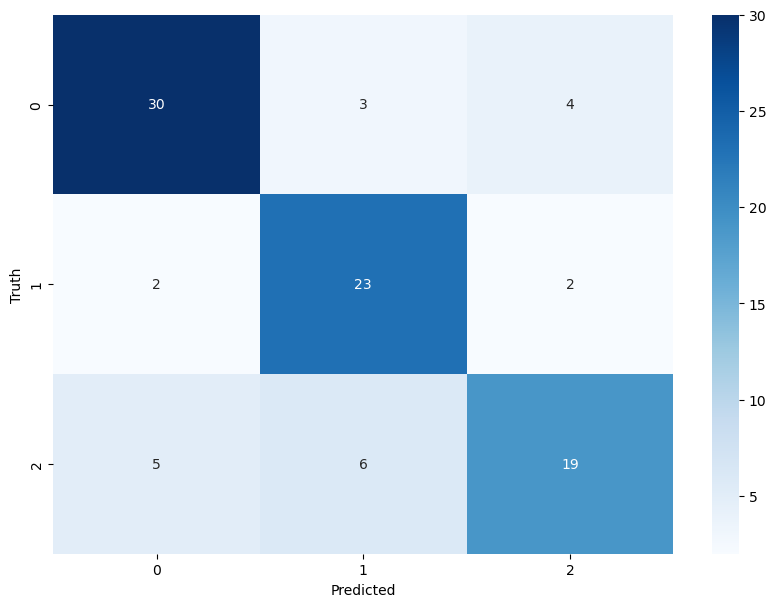

In [233]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)
cm

# Here we visualize the error
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [234]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.72      0.85      0.78        27
           2       0.76      0.63      0.69        30

    accuracy                           0.77        94
   macro avg       0.76      0.77      0.76        94
weighted avg       0.77      0.77      0.76        94



## Using DecisionTreeClassifier

In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
dtc.score(x_test, y_test)

0.6595744680851063

Text(95.72222222222221, 0.5, 'Truth')

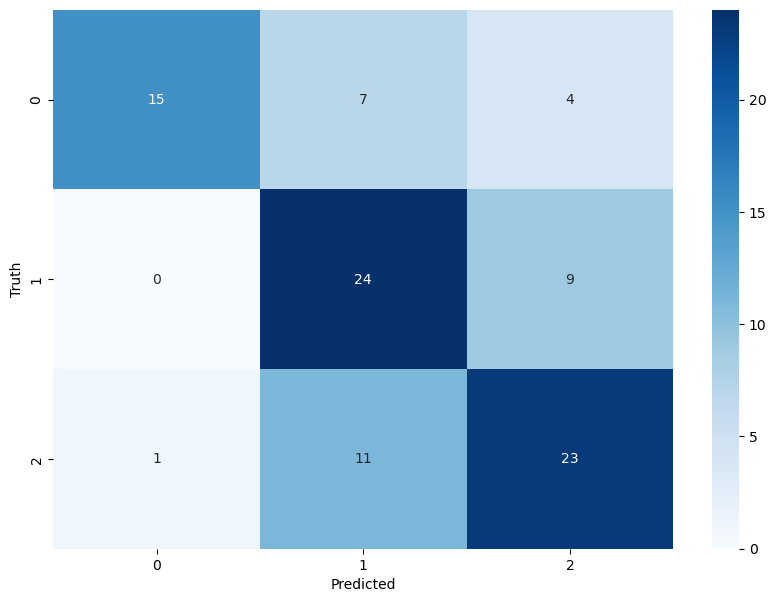

In [72]:
dtc_pred = dtc.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dtc_pred)
cm

# Here we visualize the error
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using SVC

In [73]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [74]:
svc.score(x_test, y_test)

0.7978723404255319

Text(95.72222222222221, 0.5, 'Truth')

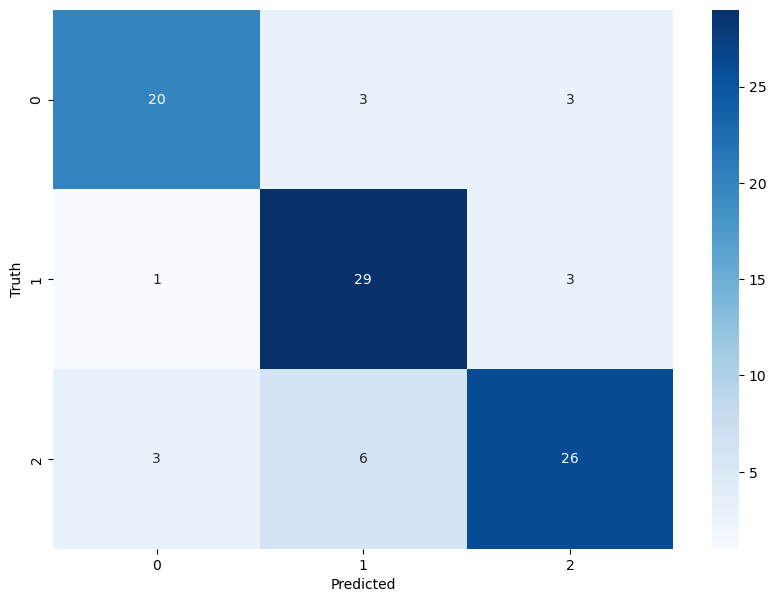

In [75]:
svc_pred = svc.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svc_pred)
cm

# Here we visualize the error
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Logistic Regression

In [76]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [77]:
lr.score(x_test, y_test)

0.7021276595744681

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_model(x, y):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2', 'elasticnet', None],
                'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ["gini", "entropy", "log_loss"],
                'splitter': ['best', 'random'],
                'max_features' : ["auto", "sqrt", "log2"]
            }
        },
        'Random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion': ["gini", "entropy", "log_loss"],
                'n_estimators' : [10, 20, 50, 100],
                'max_features' : ["sqrt", "log2", None]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algoname, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algoname,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(x_train, y_train)

## Using Deep learnig model

In [49]:
import tensorflow
from tensorflow import keras

In [235]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (x_train.shape[1],), activation='relu'),
#     keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
12/12 [==============================] - 3s 13ms/step - loss: 1.1137 - accuracy: 0.3877
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8903 - accuracy: 0.6123
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7674 - accuracy: 0.6952
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.6661 - accuracy: 0.7594
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5821 - accuracy: 0.7888
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.4980 - accuracy: 0.8235
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 0.4205 - accuracy: 0.8556
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3573 - accuracy: 0.8850
Epoch 9/100
12/12 [==============================] - 0s 8ms/step - loss: 0.2990 - accuracy: 0.9091
Epoch 10/100
12/12 [==============================] - 0s 9ms/step - loss: 0.2492 - accuracy: 0.9305
Ep

Epoch 82/100
12/12 [==============================] - 0s 9ms/step - loss: 5.7985e-04 - accuracy: 1.0000
Epoch 83/100
12/12 [==============================] - 0s 7ms/step - loss: 5.5768e-04 - accuracy: 1.0000
Epoch 84/100
12/12 [==============================] - 0s 9ms/step - loss: 5.4346e-04 - accuracy: 1.0000
Epoch 85/100
12/12 [==============================] - 0s 7ms/step - loss: 5.2322e-04 - accuracy: 1.0000
Epoch 86/100
12/12 [==============================] - 0s 7ms/step - loss: 5.1857e-04 - accuracy: 1.0000
Epoch 87/100
12/12 [==============================] - 0s 6ms/step - loss: 4.9540e-04 - accuracy: 1.0000
Epoch 88/100
12/12 [==============================] - 0s 6ms/step - loss: 4.8140e-04 - accuracy: 1.0000
Epoch 89/100
12/12 [==============================] - 0s 6ms/step - loss: 4.6638e-04 - accuracy: 1.0000
Epoch 90/100
12/12 [==============================] - 0s 7ms/step - loss: 4.5178e-04 - accuracy: 1.0000
Epoch 91/100
12/12 [==============================] - 0s 9ms/ste

In [236]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 15ms/step - loss: 1.8928 - accuracy: 0.7553


[1.8927676677703857, 0.7553191781044006]

In [237]:
y_p = model.predict(x_test)

3/3 [==============================] - 0s 15ms/step


In [238]:
y_pred = [np.argmax(i) for i in y_p]

In [239]:
y_pred[:5]

[1, 0, 0, 0, 0]

In [240]:
y_test[:5]

array([2, 0, 0, 0, 0])

In [241]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.74      0.77      0.75        26
           2       0.77      0.66      0.71        35

    accuracy                           0.76        94
   macro avg       0.75      0.76      0.75        94
weighted avg       0.76      0.76      0.75        94



In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [245]:
classifier_algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'k-Nearest Neighbors (k-NN)': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machines (SVM)': SVC(),
    'Gradient Boosting Methods': GradientBoostingClassifier(),
    'Neural Networks': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Quadratic Discriminant Analysis (QDA)': QuadraticDiscriminantAnalysis(),
    'Linear Discriminant Analysis (LDA)': LinearDiscriminantAnalysis(),
    'Gaussian Process Classifier (GPC)': GaussianProcessClassifier(),
#     'Extreme Gradient Boosting (XGBoost)': XGBClassifier(),
#     'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(),
    'Bagging': BaggingClassifier(),
#     'Voting Classifier': VotingClassifier(estimators=[]),  # Add estimators
    'Stochastic Gradient Descent (SGD) Classifier': SGDClassifier(),
    'Ridge Classifier': RidgeClassifier()
}

names = []

for name, models in classifier_algorithms.items():
    names.append(name)
    print(name)
    
accuracy = []

Logistic Regression
Naive Bayes
k-Nearest Neighbors (k-NN)
Decision Tree
Random Forest
Support Vector Machines (SVM)
Gradient Boosting Methods
Neural Networks
AdaBoost
Quadratic Discriminant Analysis (QDA)
Linear Discriminant Analysis (LDA)
Gaussian Process Classifier (GPC)
CatBoost
Bagging
Stochastic Gradient Descent (SGD) Classifier
Ridge Classifier


In [ ]:
for name, models in classifier_algorithms.items():
    models.fit(x_train, y_train)
    y_pred = models.predict(x_test)
    
    scores = models.score(x_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Score:", scores)
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

logistic = LogisticRegression()
logistic.fit(x_train, y_train)
logistic.score(x_test, y_test)

In [94]:
neural = MLPClassifier()
neural

MLPClassifier()

In [90]:
x_res

array([[ 0.02188653, -0.6065338 , -0.18629763, ..., -0.23249528,
         4.44971909, -0.23249528],
       [ 1.57384033,  0.56247866, -0.36142527, ..., -0.23249528,
        -0.22473329, -0.23249528],
       [ 0.95305881, -0.9862767 ,  2.79087214, ..., -0.23249528,
        -0.22473329, -0.23249528],
       ...,
       [-0.46764079, -0.16261075, -0.53843874, ..., -0.23249528,
        -0.22473329, -0.23249528],
       [ 1.95044256, -0.81187553,  0.93257029, ..., -0.23249528,
        -0.22473329, -0.23249528],
       [ 0.39372466,  0.5411244 , -0.79768882, ..., -0.23249528,
        -0.22473329, -0.23249528]])

In [257]:
def get_prediction(HomeTeam, AwayTeam, home_position, away_position, home_possession, away_possession, home_passes, 
                   away_passes, home_longballs, away_longballs, home_shots, away_shots, home_on_target, away_on_target,
                   home_key_players, away_key_players, home_form, away_form, home_h2h_win, h2h_draw, away_h2h_win,
                   home_conceded, away_conceded, home_odd, draw_odd, away_odd):
    home_team_index = np.where(x_res.columns==HomeTeam)[0][0]
    away_team_index = np.where(x_res.columns==AwayTeam)[0][0]
    
    var = np.zeros(len(x.columns))
    var[0] = home_form
    var[1] = home_odd
    var[2] = draw_odd
    var[3] = away_odd
    var[4] = home_position
    var[5] = away_position
    var[6] = home_possession
    var[7] = away_possession
    var[8] = home_passes
    var[9] = away_passes
    var[10] = home_longballs
    var[11] = away_longballs
    var[12] = home_shots
    var[13] = away_shots
    var[14] = home_on_target
    var[15] = away_on_target
    var[16] = home_key_players
    var[17] = away_key_players
    var[18] = home_conceded
    var[19] = away_conceded
    var[20] = away_form
    var[21] = home_h2h_win
    var[22] = h2h_draw
    var[23] = away_h2h_win
   
    if home_team_index != away_team_index:
        if home_team_index >= 0 and away_team_index >= 0:
            var[home_team_index] = 1
            var[away_team_index] = 1
            if rfc.predict([var])[0] == 0:
                return 'Away'
            elif rfc.predict([var])[0] == 1:
                return 'Draw'
            else:
                return 'Home'
#         return rfc.predict([var])[0]
    else:
        return False

In [250]:
x_res.columns[24:]

Index(['HomeTeam_Almeria', 'HomeTeam_Ath Bilbao', 'HomeTeam_Ath Madrid',
       'HomeTeam_Barcelona', 'HomeTeam_Betis', 'HomeTeam_Cadiz',
       'HomeTeam_Celta', 'HomeTeam_Getafe', 'HomeTeam_Girona',
       'HomeTeam_Mallorca', 'HomeTeam_Osasuna', 'HomeTeam_Real Madrid',
       'HomeTeam_Sevilla', 'HomeTeam_Sociedad', 'HomeTeam_Valencia',
       'HomeTeam_Vallecano', 'HomeTeam_Villarreal', 'HomeTeam_relegation 1',
       'HomeTeam_relegation 2', 'HomeTeam_relegation 3', 'AwayTeam_Almeria',
       'AwayTeam_Ath Bilbao', 'AwayTeam_Ath Madrid', 'AwayTeam_Barcelona',
       'AwayTeam_Betis', 'AwayTeam_Cadiz', 'AwayTeam_Celta', 'AwayTeam_Getafe',
       'AwayTeam_Girona', 'AwayTeam_Mallorca', 'AwayTeam_Osasuna',
       'AwayTeam_Real Madrid', 'AwayTeam_Sevilla', 'AwayTeam_Sociedad',
       'AwayTeam_Valencia', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'AwayTeam_relegation 1', 'AwayTeam_relegation 2',
       'AwayTeam_relegation 3'],
      dtype='object')

In [258]:
results = get_prediction('HomeTeam_Betis', 'AwayTeam_Barcelona', 2, 1, 30, 90, 364, 364, 19, 19, 17, 18, 6, 6, 3, 6, 3, 1.8, 1.8, 0.5, 3, 1.2, 3, 1.2, 3, 9)
results

'Away'

In [ ]:
(HomeTeam, AwayTeam, home_position, away_position, home_possession, away_possession, home_passes, 
                   away_passes, home_longballs, away_longballs, home_shots, away_shots, home_on_target, away_on_target,
                   home_key_players, away_key_players, home_form, away_form, home_h2h_win, h2h_draw, away_h2h_win,
                   home_conceded, away_conceded, home_odd, draw_odd, away_odd)

In [263]:
results = get_prediction('HomeTeam_Almeria', 'AwayTeam_Cadiz', 19, 1, 90, 20, 450, 200, 25, 18, 10, 5, 6, 2, 2, 0, 3, 1.8, 1.2, 1.8, 0.6, 1, 3, 1.5 , 4, 8)
results

'Away'

In [81]:
# Create a function to predict the outcome of a match
def get_prediction(home_team, away_team, *args):
    # Create a dictionary with the input data
    input_data = {
        'HomeTeam': home_team,
        'AwayTeam': away_team,
        'home_form': args[0],
        'home_odd': args[1],
        'draw_odd': args[2],
        'away_odd': args[3],
        'home_position': args[4],
        'away_position': args[5],
        'home_possession': args[6],
        'away_possession': args[7],
        'home_passes': args[8],
        'away_passes': args[9],
        'home_longballs': args[10],
        'away_longballs': args[11],
        'home_shots': args[12],
        'away_shots': args[13],
        'home_on_target': args[14],
        'away_on_target': args[15],
        'home_key_players': args[16],
        'away_Key_players': args[17],
        'home_conceded': args[18],
        'away_conceded': args[19],
        'away_form': args[20],
        'home_h2h_win': args[21],
        'h2h_draw': args[22],
        'away_h2h_win': args[23]
    }
    
    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data])
    
    # One-hot encode the HomeTeam and AwayTeam columns
    dummies = pd.get_dummies(input_df, columns=['HomeTeam', 'AwayTeam'])
    
    final_df = pd.concat([input_df.drop(['HomeTeam', 'AwayTeam'], axis =1), dummies], axis = 1)
    
#     # Make predictions using the trained Random Forest Classifier
#     prediction = rfc.predict(input_df)
    
#     return prediction[0]
    return final_df

# # Example usage:
# result = get_prediction('HomeTeam_Betis', 'AwayTeam_Barcelona', 0, 0, 70, 30, 364, 200, 19, 12, 17, 8, 6, 2, 3, 0.6, 1.8, 0.6, 0.6, 0.5, 3, 1.2, 3, 1.2, 3, 9)
# print(result)  # This will print the predicted outcome of the match


In [83]:
get = get_prediction('HomeTeam_Betis', 'AwayTeam_Barcelona', 0, 0, 70, 30, 364, 200, 19, 12, 17, 8, 6, 2, 3, 0.6, 1.8, 0.6, 0.6, 0.5, 3, 1.2, 3, 1.2, 3, 9)

In [84]:
get

,home_form,home_odd,draw_odd,away_odd,home_position,away_position,home_possession,away_possession,home_passes,away_passes,...,home_key_players,away_Key_players,home_conceded,away_conceded,away_form,home_h2h_win,h2h_draw,away_h2h_win,HomeTeam_HomeTeam_Betis,AwayTeam_AwayTeam_Barcelona
0,0,0,70,30,364,200,19,12,17,8,...,0.6,0.5,3,1.2,3,1.2,3,9,1,1


In [396]:
# Function to make a prediction
def get_prediction(home_team, away_team, home_form, home_odd, draw_odd, away_odd, home_position, away_position,
                   home_possession, away_possession, home_passes, away_passes, home_longballs, away_longballs,
                   home_shots, away_shots, home_on_target, away_on_target, home_key_players, away_key_players,
                   home_conceded, away_conceded, away_form, home_h2h_win, h2h_draw, away_h2h_win):
    # Assuming you have a list of all column names for the DataFrame x
    column_names = ['HomeTeam', 'AwayTeam', 'home_form', 'home_odd', 'draw_odd', 'away_odd', 'home_position',
                    'away_position', 'home_possession', 'away_possession', 'home_passes', 'away_passes',
                    'home_longballs', 'away_longballs', 'home_shots', 'away_shots', 'home_on_target',
                    'away_on_target', 'home_key_players', 'away_Key_players', 'home_conceded', 'away_conceded',
                    'away_form', 'home_h2h_win', 'h2h_draw', 'away_h2h_win']

    # Create an empty DataFrame with the specified column names
    x = pd.DataFrame(columns=column_names)

    # Append the input row to the DataFrame x
    x = x.append({
        'HomeTeam': home_team,
        'AwayTeam': away_team,
        'home_form': home_form,
        'home_odd': home_odd,
        'draw_odd': draw_odd,
        'away_odd': away_odd,
        'home_position': home_position,
        'away_position': away_position,
        'home_possession': home_possession,
        'away_possession': away_possession,
        'home_passes': home_passes,
        'away_passes': away_passes,
        'home_longballs': home_longballs,
        'away_longballs': away_longballs,
        'home_shots': home_shots,
        'away_shots': away_shots,
        'home_on_target': home_on_target,
        'away_on_target': away_on_target,
        'home_key_players': home_key_players,
        'away_Key_players': away_key_players,
        'home_conceded': home_conceded,
        'away_conceded': away_conceded,
        'away_form': away_form,
        'home_h2h_win': home_h2h_win,
        'h2h_draw': h2h_draw,
        'away_h2h_win': away_h2h_win
    }, ignore_index=True)

    # Make the prediction using the trained model
    prediction = rfc.predict(x)

    return prediction[0]


In [134]:
Barcelona = [0, 13, 5, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
real_madrid = [0, 5, 2, 1, 1, 1 , 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2]
atl_madrid = [0, 2, 8, 6, 7, 7, 7, 5, 4, 3, 4, 3, 3, 3, 5, 4, 5, 4, 4, 4, 4, 4, 4,4,3,3,3,3,3,3,3,3,3,2,3,2,3,3]
sociedad = [0, 7,11,8,9,11,8,7,6,5,3,4,3,6,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
villareal = [0,3,1,4,3,5,6,8,9,7,9,7,8,9,9,7,6,5,5,6,6,8,8,7,6,6,6,6,5,6,6,5,5,5,5,5,5,5]
betis = [0,1,3,2,4,3,3,4,5,4,5,5,4,4,6,6,4,6,6,6,7,5,5,5,5,5,5,5,6,5,5,6,6,6,6,6,6,6]
osasuna = [0,4,4,7,5,4,5,6,8,9,7,8,7,5,7,9,8,7,7,8,9,9,10,8,8,8,10,10,8,10,8,8,9,10,9,10,8,8]
athletic = [0,11,7,5,6,6,4,3,3,6,6,6,6,7,4,5,7,8,8,9,8,7,7,9,9,9,7,7,7,7,7,7,7,7,8,7,7,7]
mallorca = [0, 10,14,9,11,13,10,12,12,12,15,12,12,12,11,12,10,10,10,10,10,10,9,10,10,10,11,12,12,11,10,12,11,12,12,12,11,12]
girona = [0, 16,9,13,12,8,11,13,14,15,18,18,17,14,13,12,12,11,11,12,11,11,11,11,11,12,12,11,11,9,11,10,8,8,7,8,9,9]
sevilla = [0,14,12,15,17,16,15,17,18,14,12,16,18,17,18,18,17,19,15,13,16,12,12,14,17,13,14,13,13,13,12,11,12,11,10,9,10,11]
celta = [0, 9,16,12,8,10,13,11,11,11,14,13,16,18,17,17,16,16,17,16,12,14,14,13,12,11,9,9,10,12,13,13,13,13,13,14,14,16]
cadiz = [0, 17,19,20,20,20,19,19,19,19,19,19,19,19,19,19,18,18,14,18,18,16,18,16,15,16,15,15,14,16,15,17,14,15,16,16,17,15]
getafe = [0,18,20,18,19,18,14,14,16,16,17,17,14,13,15,14,13,15,16,19,19,19,16,19,16,18,13,14,15,15,16,18,18,18,18,17,16,14]
valencia = [0,6,10,14,10,12,9,9,7,8,8,9,10,11,10,10,11,12,12,14,17,18,19,18,19,17,18,17,18,18,17,15,16,17,14,13,13,13]
valladolid = [0,20,17,19,16,17,18,15,13,17,11,11,11,10,12,15,15,17,18,17,13,13,15,17,14,14,16,16,17,14,14,14,15,16,17,18,18,18]
espanyol = [0,8,15,16,15,15,17,16,17,13,16,14,15,16,16,16,19,14,13,15,15,17,13,12,13,15,17,18,19,19,19,19,19,19,19,19,19,19]
elche = [0, 19,18,17,18,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20]
almeria = [0, 15, 13,10,13,14,16,18,15,18,13,15,13,15,14,13,14,13,14,11,14,15,17,15,18,19,19,19,16,17,18,16,17,14,15,15,15,17]
rayo = [0,12,6,11,14,9,12,10,10,10,10,10,9,8,8,8,9,9,9,7,5,6,6,6,7,7,8,8,9,8,9,9,10,9,11,11,12,10]

team_name = ['Barcelona', 'Real Madrid', 'Ath Madrid', 'Sociedad', 'Villareal', 'Betis', 'Osasuna', 'Ath Club', 'Mallorca',
             'Girona', 'Sevilla', 'Celta', 'Cadiz', 'Getafe', 'Valencia', 'Valladolid', 'Espanyol', 'Elche', 'Almeria', 'Vallecano']

len(rayo)

38

In [391]:
for i in range(0,40):
    print(f'var[{i}]')

var[0]
var[1]
var[2]
var[3]
var[4]
var[5]
var[6]
var[7]
var[8]
var[9]
var[10]
var[11]
var[12]
var[13]
var[14]
var[15]
var[16]
var[17]
var[18]
var[19]
var[20]
var[21]
var[22]
var[23]
var[24]
var[25]
var[26]
var[27]
var[28]
var[29]
var[30]
var[31]
var[32]
var[33]
var[34]
var[35]
var[36]
var[37]
var[38]
var[39]
